# Bosques aleatorios

Los bosques aleatorios se desprenden naturalmente de los arboles de decision: si se toman muchos arboles y se promedian sus resultados, se obtiene un bosque aleatorio. Este algoritmo es de los mas populares pues presentan un excelente rendimiento de clasificacion, son altamente escalables y faciles de usar, aunque menos interpretables que los arboles de decision.

El algoritmo se puede dividir en cuatro partes:

1. Tomar una muestra **_bootstrap_** aleatoria de tamaño $n$ del conjunto de entrenamiento con reemplazo.
2. Crear un arbol de decision a partir de la muestra anterior. Para cada nodo:
    * Seleccionar al azar $d$ caracteristicas sin reemplazo.
    * Dividir el nodo utilizando la caracteristica que proporciona la mejor division segun la funcion objetivo; por ejemplo maximizando la ganancia de informacion.
3. Repita $k$ veces los pasos 1 y 2.
4. Añada la prediccion para cada arbol para asignar la etiqueta de clase por **mayoria de votos**. 

Es importante tener en cuenta una pequeña variacion del paso 2 con respecto a los arboles de decision individuales. En vez de evaluar todas las caracterisitcas para determinar la mejor division para cada nodo, solo consideraremos un subconjunto de ellas.

Una de las ventajes de este modelo es que no debemos preocuparnos demasiado por los hiperparametros. El unico al que debemos prestarle algo de atencion es al numeo de arboles $k$. Entre mayor sea el numero de arboles, mayor es el rendimiento, a expensas de un mayor coste computacional.

Otros parametros que pueden ser optimizados, aunque es poco comun su manipulacion, son el tamaño de muestra $n$ (paso 1)  y el numero de caracteristicas $d$ que se elige en cada nodo para la division (paso 2.1).

* Mediante $n$ controlamos la compensacion entre varianza y sesgo del bosque. Entre mas pequeño sea $n$, mas diversidad se introduce en las muestras, pues estas seran mas pequeñas, aumentando la aleatoriedad y reduciendo el ajuste, pero al ser muestras pequeñas, estan mas alejadas de los valores poblacionales, dando asi bajo rendimiento y aumentando el subajuste. Entre mas grande sea $n$, mayor sera el tamaño de las muestras, mayor sera el rendimiento, pero las muestras se acercaran mas al comportamiento de los datos de entrenamiento, aumentando el sobreajuste.

* Para el numero $d$, generalmente se elige para que sea igual a $\sqrt{m}$, siendo $m$ la cantidad de caracteristicas del conjunto de entrenamiento. 

In [1]:
# Graficando las regiones
# =========================================================
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [2]:
from sklearn import datasets
datos = datasets.load_iris()
X = datos.data[:, [2,3]]
y = datos.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(criterion='gini', n_estimators=15, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)
print(f'Precision en el conjunto de entrenamiento: {accuracy_score(y_train, y_pred_train)}')
print(f'Precision en el conjunto de prueba: {accuracy_score(y_test, y_pred_test)}')

Precision en el conjunto de entrenamiento: 1.0
Precision en el conjunto de prueba: 0.9333333333333333


<IPython.core.display.Javascript object>


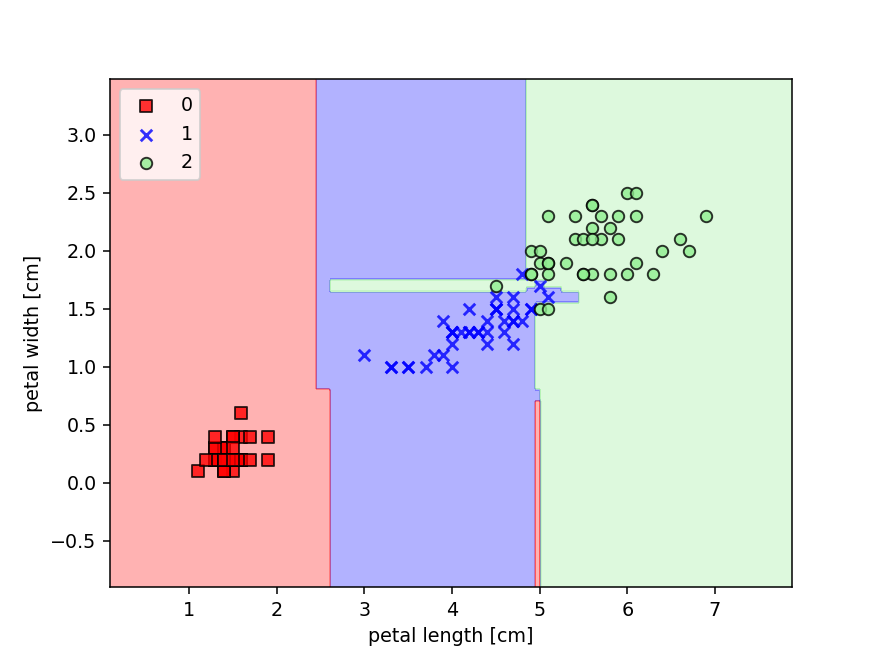

In [17]:
%matplotlib notebook
fig, ax = plt.subplots()
plot_decision_regions(X_train, y_train, classifier=forest)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')


<IPython.core.display.Javascript object>


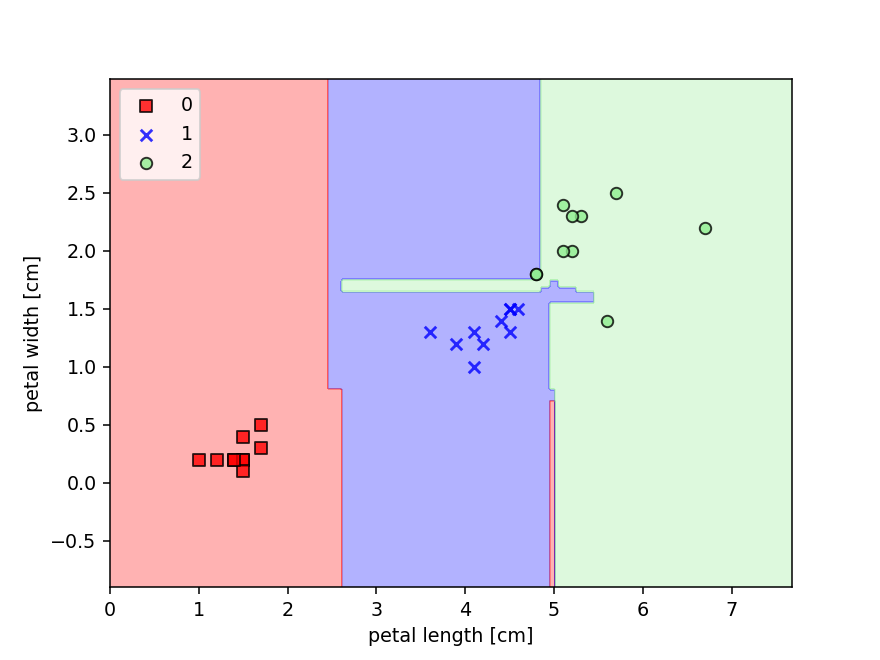

In [18]:
%matplotlib notebook
fig, ax = plt.subplots()
plot_decision_regions(X_test, y_test, classifier=forest)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

<span class="burk">EJERCICIO</span>

1. Utilice el archivo Social_Network_Ads.csv para clasificar sus clases por medio de un bosque aleatorio. Utilice las variables User Age, EstimatedSalary, Purchased. Grafique, mida la precision de los conjuntos de entrenamiento y test y saque sus conclusiones.

2. Utilice el archivo usuarios_win_mac_lin y clasifique sus clases por medio de bosques aleatorios. Mida la precision de los conjuntos de entrenamiento y test y saque sus conclusiones.

3. Utilice la siguiente instruccion para cargar valores para X y y:

         datasets.make_classification(1000, 20, n_informative=3)
    Realice la parte de preprocesado, clasifique los datos y mida su precision.

    Mas informacion sobre esta instruccion en: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html